<a href="https://colab.research.google.com/github/aashish3808/generative-ai-for-beginners/blob/main/Proj_3_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

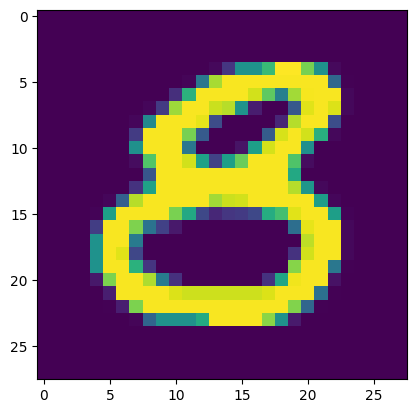

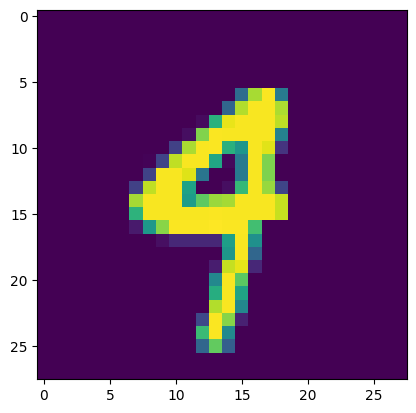

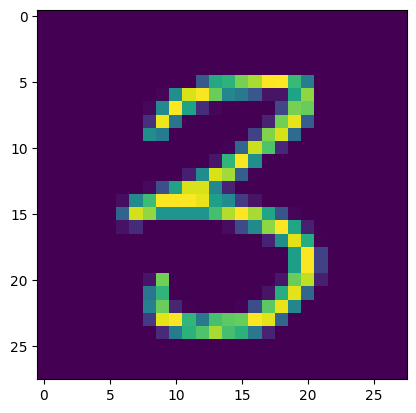

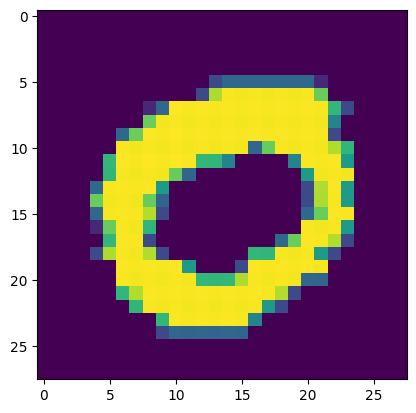

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 169s 90ms/step - accuracy: 0.9191 - loss: 0.6435 - val_accuracy: 0.9686 - val_loss: 0.1009
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 88ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9759 - val_loss: 0.0853
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 85ms/step - accuracy: 0.9884 - loss: 0.0383 - val_accuracy: 0.9737 - val_loss: 0.1038
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Accuracy score is 97.37 %
Confusion matrix of Neural Network is 
 [[ 968    1    1    0    0    1    1    1    6    1]
 [   3 1102    7    1    0    2    4    0   16    0]
 [   2    3 1010    3    2    0    1    8    3    0]
 [   0    0    2 1001    0    5    0    1    1    0]
 [   0    1    3    2  928    0    7    3    6   32]
 [   0    0    1   16    0  869    2    1    2    1]
 [   7    3    0    0    1    5  935    0    7    0]
 [   0    1   15    5    1    0    0  987    2   17]
 [   3    0    2    4    0    5    0    2  953    5]
 [   0    3    0    4    4   

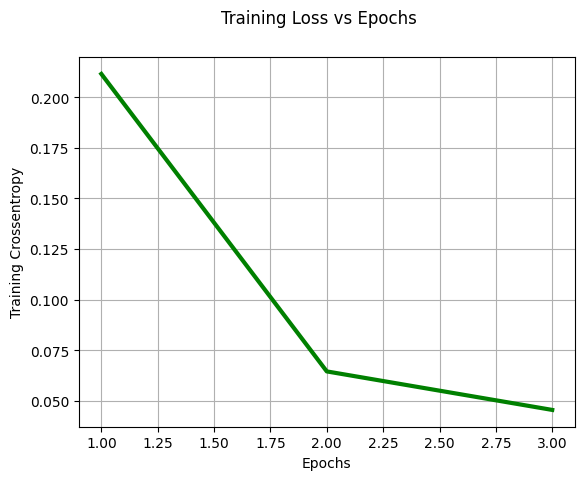

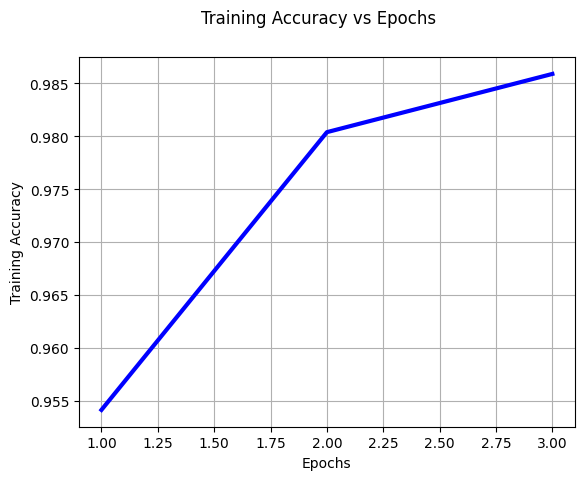

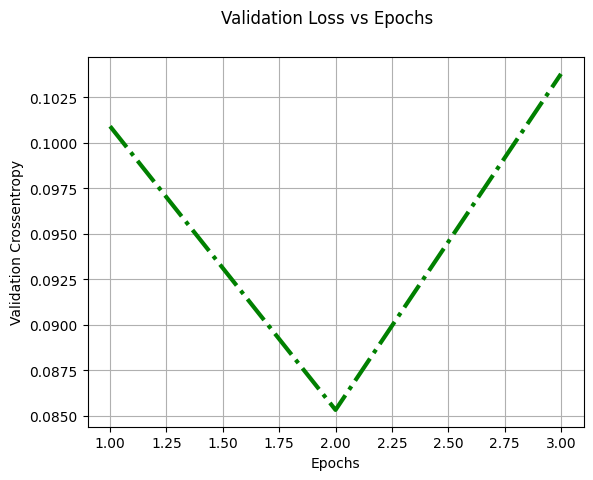

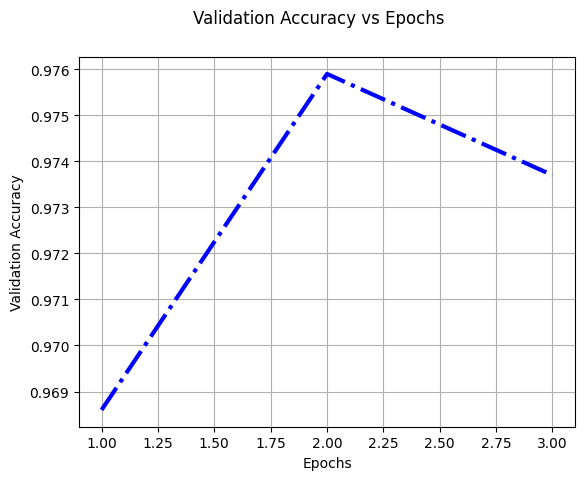

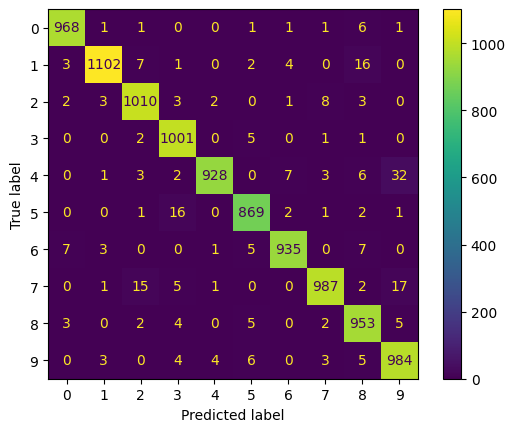

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nc = 10 # Number of classes



#MNIST dataset will be used that is packaged as part of the TensorFlow installation.
#This MNIST dataset is a set of 28×28 pixel grayscale images which represent
#hand-written digits.  It has 60,000 training rows, 10,000 testing rows,
#and 5,000 validation rows. It is a very common, basic, image classification
#dataset that is used in machine learning.
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()


#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=3)

ypred = model.predict(Xtest)
ypred = np.argmax(ypred, axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()